In [32]:
%matplotlib inline
import gdal
from osgeo import osr
import sys
import netCDF4
import numpy as np
import xarray as xr
import os
from itertools import groupby
import matplotlib.pyplot as plt

In [33]:
filenames = list(filter(lambda x: x.endswith('.nc'), os.listdir('./data')))
# filenames = filenames[0:3]
filenames

['pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1951.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1952.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1953.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1954.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1955.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1956.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1957.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1958.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1959.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1960.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1961.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1962.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1963.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1964.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1965.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1966.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1967.nc',
 'pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1968.nc',
 'pr_day_BCS

In [31]:
# Averages over an axis. Can group by by season
for filename in filenames:
    file = xr.open_dataset(filename)
    tag = filename.split('.')[0]
    print('Processing ' + tag)
    out = file.mean(dim='time')
    print(out)

Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1991
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    pr       (lat, lon) float64 1.119e-06 1.065e-06 1.012e-06 9.582e-07 ...
Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1992
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    pr       (lat, lon) float64 5.286e-07 4.666e-07 4.045e-07 3.424e-07 ...
Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1993
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1

In [15]:
# Rolling operations
def consecWD(arr):
    cwd_count = 0
    max_count = 0
    for val in arr:
        if val >= 0.0000029398:
            cwd_count = cwd_count + 1
            if cwd_count > max_count:
                max_count = cwd_count
        else:
            cwd_count = 0
    return max_count
    
for filename in filenames:
    file = xr.open_dataset(filename)
    tag = filename.split('.')[0]
    print('Processing ' + tag)
    a = file.rolling(time = 3)
    print(a.mean())


Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1991
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-01T12:00:00 1991-01-02T12:00:00 ...
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    pr       (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1992
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 366)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-01T12:00:00 1992-01-02T12:00:00 ...
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    pr       (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1993
<xarray.Dataset>
D

In [25]:
# NP reductions
for filename in filenames:
    file = xr.open_dataset(filename)
    tag = filename.split('.')[0]
    print('Processing ' + tag)
    a = file.reduce(np.amax, dim='time') # Only numpy ufuncs
    print(a)

Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1991
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    pr       (lat, lon) float64 7.833e-05 7.894e-05 7.954e-05 8.268e-05 ...
Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1992
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
Data variables:
    pr       (lat, lon) float64 6.32e-05 5.417e-05 4.514e-05 3.612e-05 ...
Processing pr_day_BCSD_historical_r1i1p1_ACCESS1-0_1993
<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.

In [45]:
prefix="data"

def get_file(var, scenario, model, year, **kwargs):
    filename = var + "_day_BCSD_" + scenario + "_r1i1p1_" + model + "_" + year + ".nc"
    filename = kwargs.get("prefix") + "/" + filename if kwargs.get('prefix') else filename
    print(filename)
    dataset = xr.open_dataset(filename)
    return dataset



data/tasmax_day_BCSD_historical_r1i1p1_ACCESS1-0_1950.nc


C:\Users\srcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater


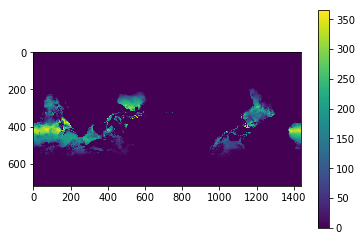

In [46]:
def tmax90F(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 305.372).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(tmax90F("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

C:\Users\srcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater


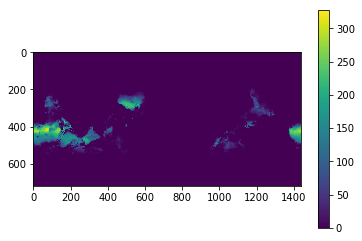

In [40]:
def tmax95F(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 308.150).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(tmax95F("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

C:\Users\srcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater


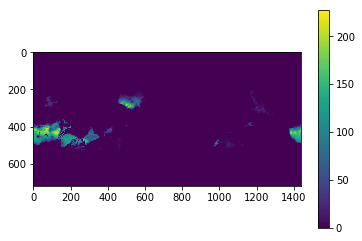

In [41]:
def tmax100F(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x > 310.928).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(tmax100F("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

C:\Users\srcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in less


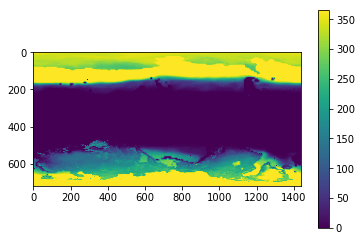

In [43]:
def icing_days(scenario, model, year, **kwargs):
    dataset = get_file("tasmax", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x < 273.150).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(icing_days("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()

C:\Users\srcor\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in less


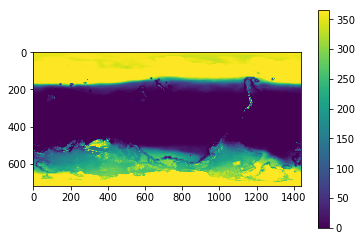

In [44]:
def frost_days(scenario, model, year, **kwargs):
    dataset = get_file("tasmin", scenario, model, year, prefix = kwargs.get('prefix'))
    data_array = dataset.to_array()
    result = np.apply_along_axis(lambda x: (x < 273.150).sum(), 1, data_array)
    return result

plt.imshow(np.squeeze(frost_days("historical", "ACCESS1-0", "1950", prefix=prefix)))
plt.colorbar()